# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY closes at a X-day low, buy with full capital.
    3. If the SPY closes at a X-day high, sell some.
       If it sets further highs, sell some more, etc...
    4. If you have free cash, use it all when fresh lows are set.
    
    (Scaling out)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
end = datetime.datetime.now()

Define high low trade periods

In [4]:
period = 7

Define max number of positions to scale into

In [5]:
max_positions = 2

Run Strategy

In [6]:
s = strategy.Strategy(symbol, capital, start, end, period=period, max_positions=max_positions)
s.run()

Retrieve log DataFrames

In [7]:
tlog, dbal = s.get_logs()
stats = s.get_stats()

In [8]:
tlog.tail(10)

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
172,2020-01-08,28.35,2020-01-24,29.22,0.87,352.35,405,13582.08,LONG,GDX
173,2020-01-28,28.31,2020-02-18,29.23,0.92,382.72,416,13964.80,LONG,GDX
174,2020-01-28,28.31,2020-02-19,29.75,1.44,599.04,416,14563.84,LONG,GDX
175,2020-02-04,28.05,2020-02-19,29.75,1.70,1.70,1,14565.54,LONG,GDX
176,2020-02-27,28.15,2020-03-25,26.31,-1.84,-802.24,436,13763.30,LONG,GDX
177,2020-02-27,28.15,2020-04-06,26.34,-1.81,-789.16,436,12974.14,LONG,GDX
178,2020-04-30,32.26,2020-05-05,34.79,2.53,900.68,356,13874.82,LONG,GDX
179,2020-04-30,32.26,2020-05-07,35.03,2.77,986.12,356,14860.94,LONG,GDX
180,2020-05-26,34.08,2020-06-10,34.53,0.45,163.80,364,15024.74,LONG,GDX
181,2020-05-26,34.08,2020-06-12,32.64,-1.44,-525.60,365,14499.14,LONG,GDX


In [9]:
dbal.tail()

,high,low,close,shares,cash,state
date,,,,,,
2020-06-08,23935.11,23410.23,23935.11,729,16.62,-
2020-06-09,24416.25,23825.76,24416.25,729,16.62,-
2020-06-10,25188.99,24426.14,25188.99,365,12585.54,X
2020-06-11,25331.34,24407.89,25331.34,365,12585.54,-
2020-06-12,24499.14,24499.14,24499.14,0,24499.14,X


Generate strategy stats - display all available stats

In [10]:
pf.print_full(stats)

start                                                  2007-03-08
end                                                    2020-06-12
beginning_balance                                           10000
ending_balance                                           24499.14
total_net_profit                                         14499.14
gross_profit                                             37470.08
gross_loss                                              -22970.94
profit_factor                                                1.63
return_on_initial_capital                                  144.99
annual_return_rate                                           6.99
trading_period                           13 years 3 months 4 days
pct_time_in_market                                          29.81
total_num_trades                                              182
trades_per_year                                             13.72
num_winning_trades                                            121
num_losing

Equity curve

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [11]:
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

2007-03-08 00:00:00 BUY  260 GDX @ 38.35
2020-06-12 00:00:00 SELL 260 GDX @ 32.64


Plot Equity Curves: Strategy vs Benchmark

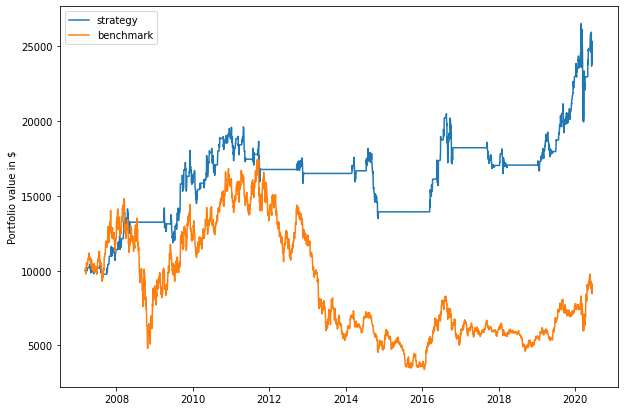

In [12]:
pf.plot_equity_curve(dbal, benchmark=benchmark.dbal)

Plot Trades

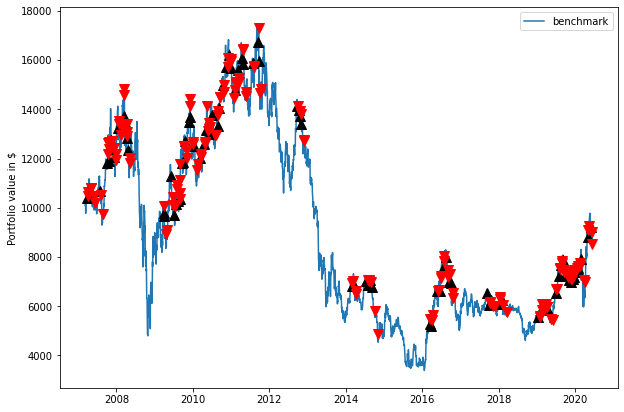

In [13]:
pf.plot_trades(dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,6.99,-1.20
max_closed_out_drawdown,-31.25,-80.58
drawdown_annualized_return,-4.47,66.91
drawdown_recovery,-3.52,-4.36
best_month,19.33,65.27
worst_month,-18.81,-50.43
sharpe_ratio,0.46,0.14
sortino_ratio,0.37,0.21
monthly_std,3.99,10.61


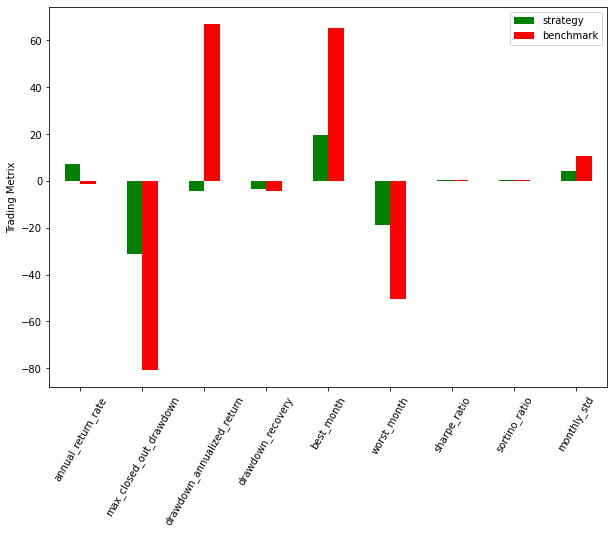

In [14]:
df = pf.plot_bar_graph(stats, benchmark.stats)
df